In [89]:
# ================================================================
# Predicting Solar Power Output using Multivariable Linear Regression
# SDG 7: Affordable and Clean Energy
# ================================================================
# PROBLEM STATEMENT:
# Build a regression model to predict solar power output (kW)
# using Irradiation (W/m^2), Temperature (°C), and Wind Speed (m/s).
#
# Idea:
# Solar output mainly depends on irradiation. High temperature
# reduces efficiency. Light wind slightly improves cooling.
# This simulated dataset trains quickly and shows a realistic pattern.
# ================================================================

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


In [90]:
# ================================================================
# 2. SIMULATED DATA GENERATION
# ================================================================
N = 500
np.random.seed(42)

irradiation = np.random.uniform(0, 1000, N)
temperature = np.random.uniform(15, 40, N)
wind_speed = np.random.uniform(0, 10, N)

# Power Output Formula
output = (irradiation * 0.15) - (temperature * 0.5) + (wind_speed * 1.5) + np.random.normal(0, 5, N)
output[output < 0] = 0  # No negative power

df = pd.DataFrame({
    "Irradiation_Wm2": irradiation,
    "Temperature_C": temperature,
    "Wind_Speed_ms": wind_speed,
    "Power_Output_kW": output
})

df.head()


,Irradiation_Wm2,Temperature_C,Wind_Speed_ms,Power_Output_kW
0,374.540119,32.454043,1.851329,30.233962
1,950.714306,28.402409,5.419009,147.989168
2,731.993942,22.738190,8.729458,104.576321
3,598.658484,35.344875,7.322249,74.882714
4,156.018640,32.118279,8.065611,24.554926


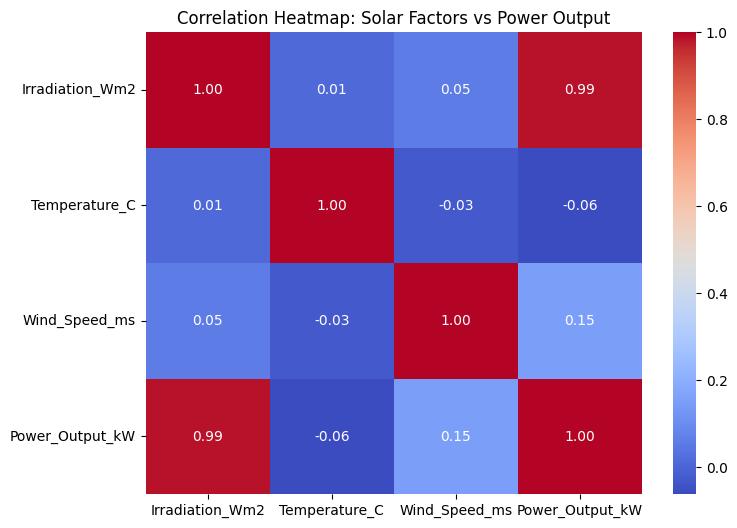

In [91]:
# ================================================================
# 3. VISUALIZATION: CORRELATION HEATMAP
# ================================================================
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Solar Factors vs Power Output")
plt.show()


In [92]:
# ================================================================
# 4. FEATURE SELECTION AND DATA SPLIT
# ================================================================
X = df[["Irradiation_Wm2", "Temperature_C", "Wind_Speed_ms"]]
y = df["Power_Output_kW"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [93]:
# ================================================================
# 5. TRAINING THE LINEAR REGRESSION MODEL
# ================================================================
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [94]:
# ================================================================
# 6. MODEL EVALUATION
# ================================================================
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared Score:", round(r2, 4))
print("Mean Absolute Error:", round(mae, 2), "kW")

# Display learned coefficients
print("\nLearned Coefficients:")
coeff = pd.Series(model.coef_, index=X.columns)
print(coeff)


R-squared Score: 0.985
Mean Absolute Error: 4.16 kW

Learned Coefficients:
Irradiation_Wm2    0.149489
Temperature_C     -0.437651
Wind_Speed_ms      1.520516
dtype: float64


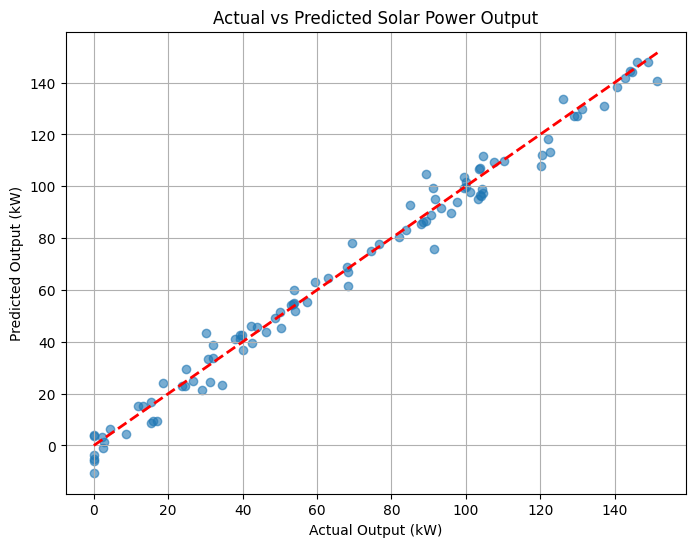

In [95]:
# ================================================================
# 7. VISUALIZATION: ACTUAL vs PREDICTED
# ================================================================
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)

plt.title("Actual vs Predicted Solar Power Output")
plt.xlabel("Actual Output (kW)")
plt.ylabel("Predicted Output (kW)")
plt.grid(True)
plt.show()
